# 머신러닝 스터디 미니 프로젝트

## 범죄율 예측

* Kaggle

https://www.kaggle.com/arslanali4343/real-estate-dataset

* 변수 설명

CRIM : 도시별 1인당 범죄율

ZN : 25,000 평방피트가 넘는 대지의 면적

INDUS : 도시당 실업 면적의 비율

CHAS (Charles River) : 강 경계 x = 1, 강 경계 x = 0

NOX : 산화질소 농도

RM : 주거당 평균 방수

DIS : 5개의 보스턴 고용인원까지의 가중 거리

RAD : 방사형 고속도로 접근성 지수

TAX : 1만 달러당 전체 가치 부동산-세금 운명

AGE : 1940 년 이전에 지어진 소유주가 소유 한 주택의 연령 비율

B : 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인의 비율입니다.

LSTAT : 모집단의 하위 상태 %

MEDV : 1000달러 기준 자가주택의 중간값

## (1) 패키지 불러오기

In [149]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

## (2) 데이터 불러오기

In [150]:
data_path = 'data.csv'
data = pd.read_csv(data_path, encoding = 'CP949')

In [151]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


## (3) EDA

### 결측값 확인 및 처리

In [153]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [154]:
data[data['RM'].isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [155]:
mean_rm = data['RM'].mean(axis = 0)
data['RM'] = data.fillna(mean_rm) # 결측치 평균으로 대체

In [156]:
mean_rm = data['RM'].mean(axis = 0)
mean_rm

3.584138577299414

In [157]:
data.isnull().sum() # 결측치 사라짐

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 상관관계

In [158]:
cols = ["ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
        "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
corr = data[cols].corr(method = 'pearson')
print(corr)

               ZN     INDUS      CHAS       NOX        RM       AGE       DIS  \
ZN       1.000000 -0.534106 -0.041333 -0.516256 -0.198451 -0.567796  0.665185   
INDUS   -0.534106  1.000000  0.062332  0.763583  0.405524  0.642817 -0.707886   
CHAS    -0.041333  0.062332  1.000000  0.091023 -0.054906  0.085814 -0.097541   
NOX     -0.516256  0.763583  0.091023  1.000000  0.420524  0.729233 -0.768309   
RM      -0.198451  0.405524 -0.054906  0.420524  1.000000  0.350847 -0.377028   
AGE     -0.567796  0.642817  0.085814  0.729233  0.350847  1.000000 -0.745097   
DIS      0.665185 -0.707886 -0.097541 -0.768309 -0.377028 -0.745097  1.000000   
RAD     -0.307146  0.591784 -0.005343  0.609343  0.625964  0.452229 -0.488474   
TAX     -0.311531  0.718764 -0.034244  0.666982  0.583389  0.503360 -0.530379   
PTRATIO -0.392844  0.379441 -0.124415  0.186073  0.276695  0.258251 -0.238155   
B        0.175637 -0.356955  0.048970 -0.379936 -0.384356 -0.271925  0.290997   
LSTAT   -0.390029  0.556707 

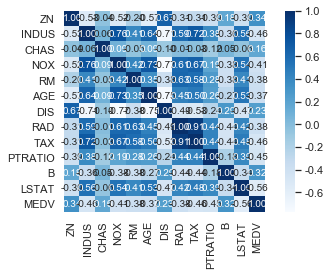

In [159]:
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 10},
                xticklabels = cols,
                yticklabels = cols,
                cmap = 'Blues')
plt.tight_layout()
plt.show()

### 데이터 세트 분리하기

In [160]:
from sklearn.model_selection import train_test_split

x = data[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
y = data[['CRIM']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

### 모델 생성하기

In [161]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_predict = mlr.predict(x_test)

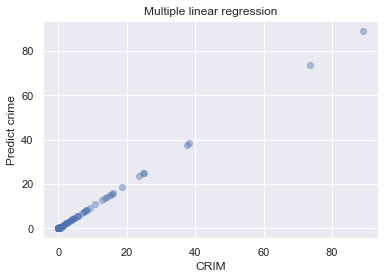

In [163]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel("CRIM")
plt.ylabel("Predict crime")
plt.title("Multiple linear regression")
plt.show()

In [164]:
print(mlr.coef_)

[[-2.20932052e-17 -2.59684124e-16 -1.16988495e-15  2.44459557e-14
   1.00000000e+00  3.08760099e-17  1.90100282e-16 -1.94495572e-16
   4.89708127e-17 -2.15296055e-16  3.27815757e-17 -5.68106092e-16
  -4.58377470e-16]]


In [166]:
print(mlr.score(x_train, y_train))

1.0


### 독립성

In [128]:
from scipy.stats import chi2_contingency
data_crosstab = pd.crosstab(data["RAD"], data["TAX"])
chi2_contingency(data_crosstab)

(3362.547672484171,
 0.0,
 528,
 array([[3.91389432e-02, 2.73972603e-01, 3.13111546e-01, 3.91389432e-02,
         1.95694716e-01, 2.73972603e-01, 1.95694716e-01, 3.91389432e-01,
         3.91389432e-02, 3.52250489e-01, 3.91389432e-02, 7.82778865e-02,
         1.56555773e-01, 3.91389432e-02, 1.17416830e-01, 1.56555773e-01,
         7.82778865e-02, 1.95694716e-01, 3.91389432e-02, 3.91389432e-02,
         4.69667319e-01, 7.82778865e-02, 2.73972603e-01, 1.95694716e-01,
         3.52250489e-01, 4.30528376e-01, 1.56555773e-01, 3.91389432e-02,
         1.56555773e-01, 2.73972603e-01, 3.91389432e-02, 3.13111546e-01,
         1.95694716e-01, 1.17416830e-01, 3.13111546e-01, 2.73972603e-01,
         5.47945205e-01, 1.56555773e-01, 1.56555773e+00, 2.73972603e-01,
         3.91389432e-02, 7.82778865e-02, 1.17416830e-01, 2.73972603e-01,
         3.91389432e-01, 7.82778865e-02, 7.82778865e-02, 7.82778865e-02,
         1.56555773e-01, 7.82778865e-02, 3.91389432e-02, 7.82778865e-02,
         1.17416830

순서대로 검정통계량, P-value, 자유도, 기대도수

In [129]:
from statsmodels.formula.api import ols

res = ols('CRIM ~ ZN', data=data).fit()

C:\Users\adore\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\adore\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


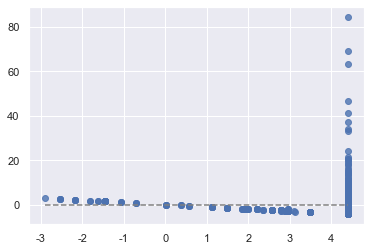

In [130]:
fitted = res.predict(data)
residual = data["CRIM"] - fitted

sns.regplot(fitted, residual, lowess = True, line_kws = {'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

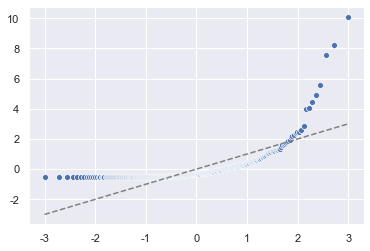

In [131]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')

In [132]:
scipy.stats.shapiro(residual)

(0.501678466796875, 1.8719535167260063e-35)

### 이상값 처리

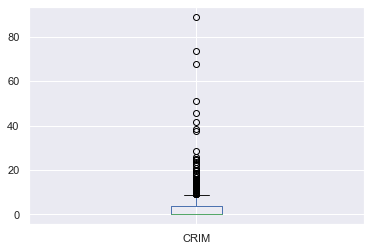

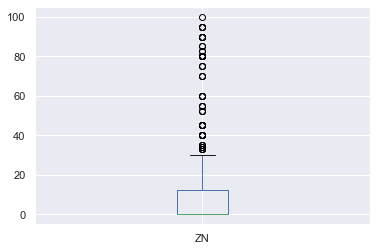

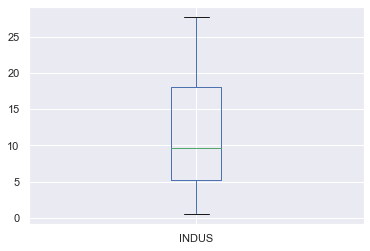

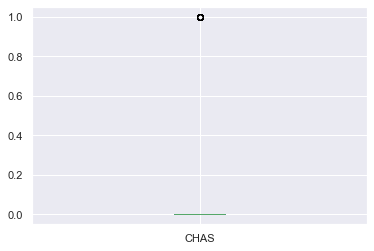

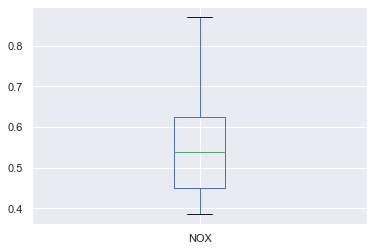

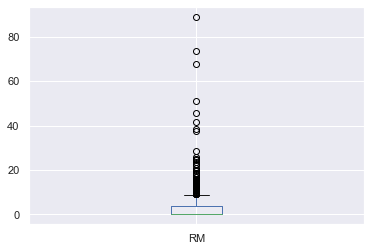

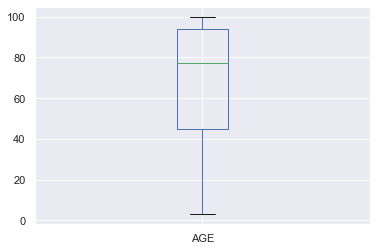

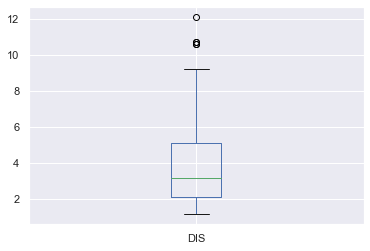

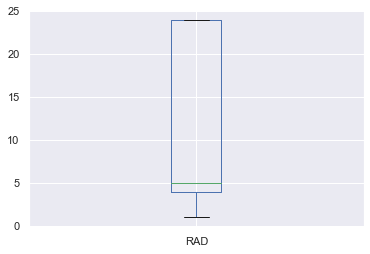

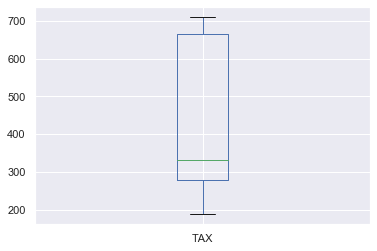

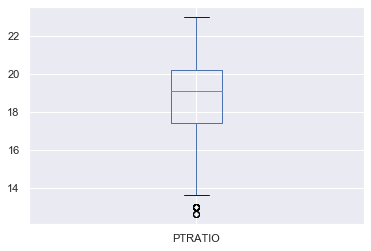

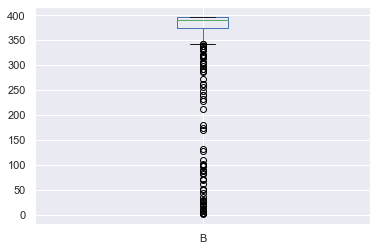

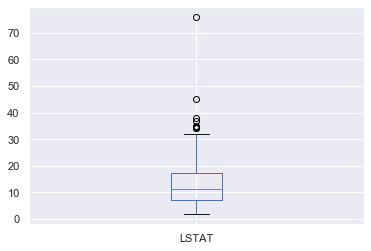

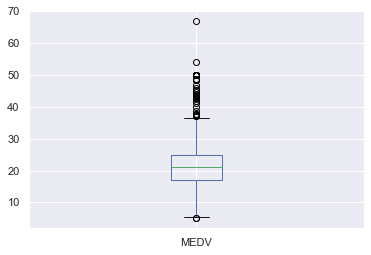

In [133]:
data.plot(kind = 'box', y = 'CRIM')
data.plot(kind = 'box', y = 'ZN')
data.plot(kind = 'box', y = 'INDUS')
data.plot(kind = 'box', y = 'CHAS')
data.plot(kind = 'box', y = 'NOX')
data.plot(kind = 'box', y = 'RM')
data.plot(kind = 'box', y = 'AGE')
data.plot(kind = 'box', y = 'DIS')
data.plot(kind = 'box', y = 'RAD')
data.plot(kind = 'box', y = 'TAX')
data.plot(kind = 'box', y = 'PTRATIO')
data.plot(kind = 'box', y = 'B')
data.plot(kind = 'box', y = 'LSTAT')
data.plot(kind = 'box', y = 'MEDV')

In [134]:
q1 = data['CRIM'].quantile(0.25)
q3 = data['CRIM'].quantile(0.75)

iqr = q3 - q1

re = (data['CRIM'] < q1 - iqr * 1.5) | (data['CRIM'] > q3 + iqr * 1.5)
data[re]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1,0.770,8.98296,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
367,13.52220,0.0,18.1,0,0.631,13.52220,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.23230,0.0,18.1,0,0.631,9.23230,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.10810,0.0,18.1,0,0.668,11.10810,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.1,0,0.668,18.49820,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.57570,0.0,18.1,0,0.580,15.57570,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
469,13.07510,0.0,18.1,0,0.580,13.07510,56.7,2.8237,24,666,20.2,396.90,14.76,20.1
477,15.02340,0.0,18.1,0,0.614,15.02340,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.1,0,0.614,10.23300,96.7,2.1705,24,666,20.2,379.70,18.03,14.6


### 정규화

In [135]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()
transformer.fit(data)

data = transformer.transform(data)

print(data)

[[-0.07216186  1.44       -0.57164988 ...  0.25860465 -0.64442231
   0.35220126]
 [-0.06623056  0.         -0.20294345 ...  0.25860465 -0.23007968
   0.05031447]
 [-0.06623621  0.         -0.20294345 ...  0.06930233 -0.73904382
   1.69811321]
 ...
 [ 0.05160999  0.          0.21766073 ... -2.24837209  0.95119522
   4.12578616]
 [ 0.14579312  0.          0.23315259 ... -2.24837209  6.42928287
   5.76100629]
 [ 0.11094847  0.          0.24089853 ... -3.27162791  3.34163347
   0.35220126]]


## (4) 모델링